<a href="https://colab.research.google.com/github/Eduardoqro/Kata-Data-Visualization/blob/main/Modulo_6_ex02_marcopeixCH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from https://colab.research.google.com/github/marcopeix/TimeSeriesForecastingInPython/blob/master/CH01/CH01.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


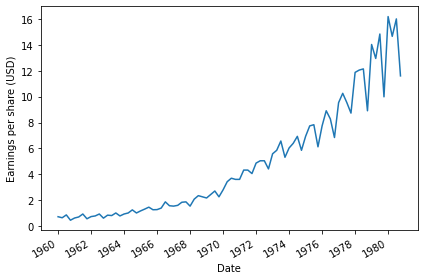

In [5]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [6]:
#advanced_decomposition = STL(df.data, period=4).fit()
df.date = pd.to_datetime(df.date)
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


In [7]:
df2 = df.set_index("date")
df3 = df2.drop(columns="year")

In [8]:
decomposed = seasonal_decompose(df3["data"], model="additive",freq=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


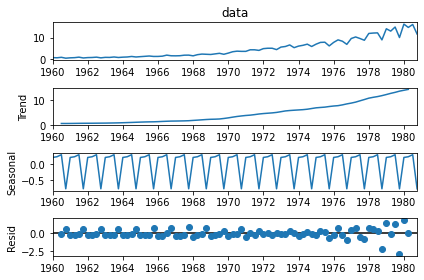

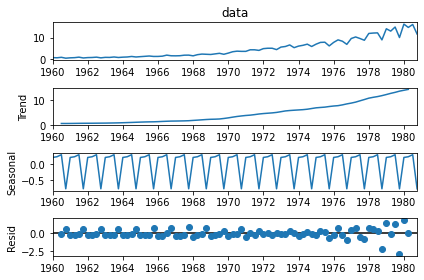

In [9]:
decomposed.plot()

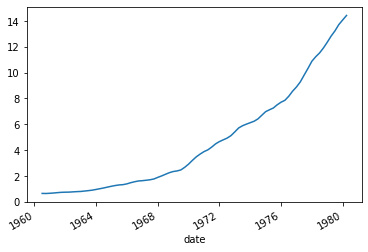

In [10]:
decomposed.trend.plot()

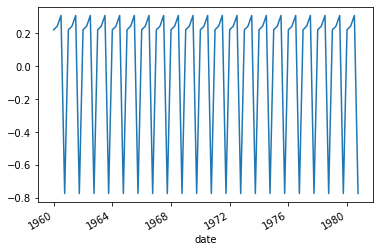

In [11]:
decomposed.seasonal.plot()

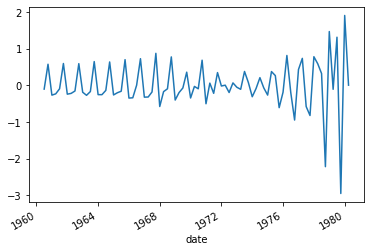

In [12]:
decomposed.resid.plot()

In [13]:
# definimos funciones para determinar la descomposición por tendencia y estacionalidad

def graphtrend(df,periodo,model='multiplicative',label='sin definir'):
    decomp = seasonal_decompose(df,model=model,period=periodo)
    return decomp.trend.plot(legend=True,label=label)

def graphseasonal(df,periodo,model='multiplicative',label='sin definir'):
    decomp = seasonal_decompose(df,model=model,period=periodo)
    return decomp.seasonal.plot(legend=True,label=label)

def graphresidual(df,periodo,model='multiplicative',label='sin definir'):
    decomp = seasonal_decompose(df,model=model,period=periodo)
    return decomp.residual.plot(legend=True,label=label)
  

# Challenge

Challenge: obtener un dataset de series de tiempo y obtener la descomposición

Sugerencias:
- [7 Time Series Datasets for Machine Learning](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/)
- [Time Series Kaggle](https://www.kaggle.com/datasets/shenba/time-series-datasets)